# Classification of ECG Heartbeat Arrhythmia Project

In [21]:
import numpy as np
import pandas as pd
from scipy.fft import fft, fftfreq
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

## Importing the data set

### We use the the MIT-BIH Arrhythmia Dataset 
#### - Number of Samples: 109446
#### - Number of Categories: 5
#### - Sampling Frequency: 125Hz
#### - Data Source: Physionet's MIT-BIH Arrhythmia Dataset
#### - Classes: ['N': 0, 'S': 1, 'V': 2, 'F': 3, 'Q': 4]
#### N :: Normal beat
#### S :: Supraventricular premature beat
#### V :: Premature ventricular contraction
#### F :: Fusion of ventricular and normal beat
#### Q :: Unclassifiable beat




In [22]:
_labels_ = ['Normal beat', 
            'Supraventricular premature beat', 
            'Premature ventricular contraction', 
            'Fusion of ventricular and normal beat',
            'Unclassifiable beat']

In [23]:
data_train = pd.read_csv('data/mitbih_train.csv',header=None,sep=',')
data_test = pd.read_csv('data/mitbih_test.csv',header=None,sep=',')

In [24]:
labels = {'N': 0, 'S': 1, 'V': 2, 'F': 3, 'Q': 4}
print('Train data set: {}'.format(data_train.shape[0]))
print('Test data set: {}'.format(data_test.shape[0]))
print('Total : {}'.format(data_train.shape[0]+data_test.shape[0]))

Train data set: 87554
Test data set: 21892
Total : 109446


In [25]:
data_train.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
data_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
count,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,...,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000
mean,0.890360,0.758160,0.423972,0.219104,0.201127,0.210399,0.205808,0.201773,0.198691,0.196757,...,0.005025,0.004628,0.004291,0.003945,0.003681,0.003471,0.003221,0.002945,0.002807,0.473376
std,0.240909,0.221813,0.227305,0.206878,0.177058,0.171909,0.178481,0.177240,0.171778,0.168357,...,0.044154,0.042089,0.040525,0.038651,0.037193,0.036255,0.034789,0.032865,0.031924,1.143184
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.921922,0.682486,0.250969,0.048458,0.082329,0.088416,0.073333,0.066116,0.065000,0.068639,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.991342,0.826013,0.429472,0.166000,0.147878,0.158798,0.145324,0.144424,0.150000,0.148734,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.910506,0.578767,0.341727,0.258993,0.287628,0.298237,0.295391,0.290832,0.283636,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


In [27]:
# the last column of the data set consists of the arrhythmia labels

data_train.describe().iloc[:,-1]

count    87554.000000
mean         0.473376
std          1.143184
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: 187, dtype: float64

In [28]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87554 entries, 0 to 87553
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 125.6 MB


### Class percentage

In [29]:
data = pd.concat([data_train,data_test])

In [30]:
nums = data[187].value_counts()

In [31]:
nums

0.0    90589
4.0     8039
2.0     7236
1.0     2779
3.0      803
Name: 187, dtype: int64

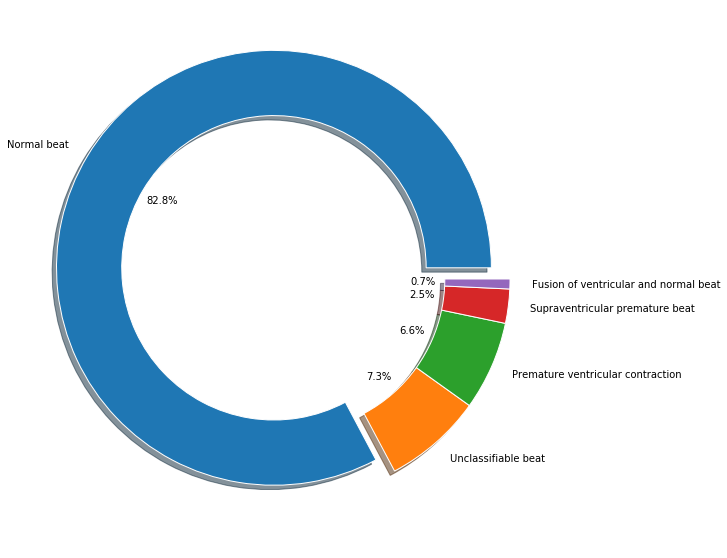

In [32]:
explode = (0.1,0,0,0,0)
labels_ind = [list(labels.keys())[ind] for ind in nums.index.astype(int)]
labels_ind_ = [_labels_[ind] for ind in nums.index.astype(int)]
size=0.3

plt.figure(figsize=(10,10))
plt.pie(
    x=nums,
    explode=explode,
    labels=labels_ind_,
    pctdistance=0.6,
    radius=1,
    wedgeprops=dict(width=size, edgecolor='w'),
    shadow=True,
    labeldistance=1.1,
    autopct='%1.1f%%')
plt.show()

#### An example for every class

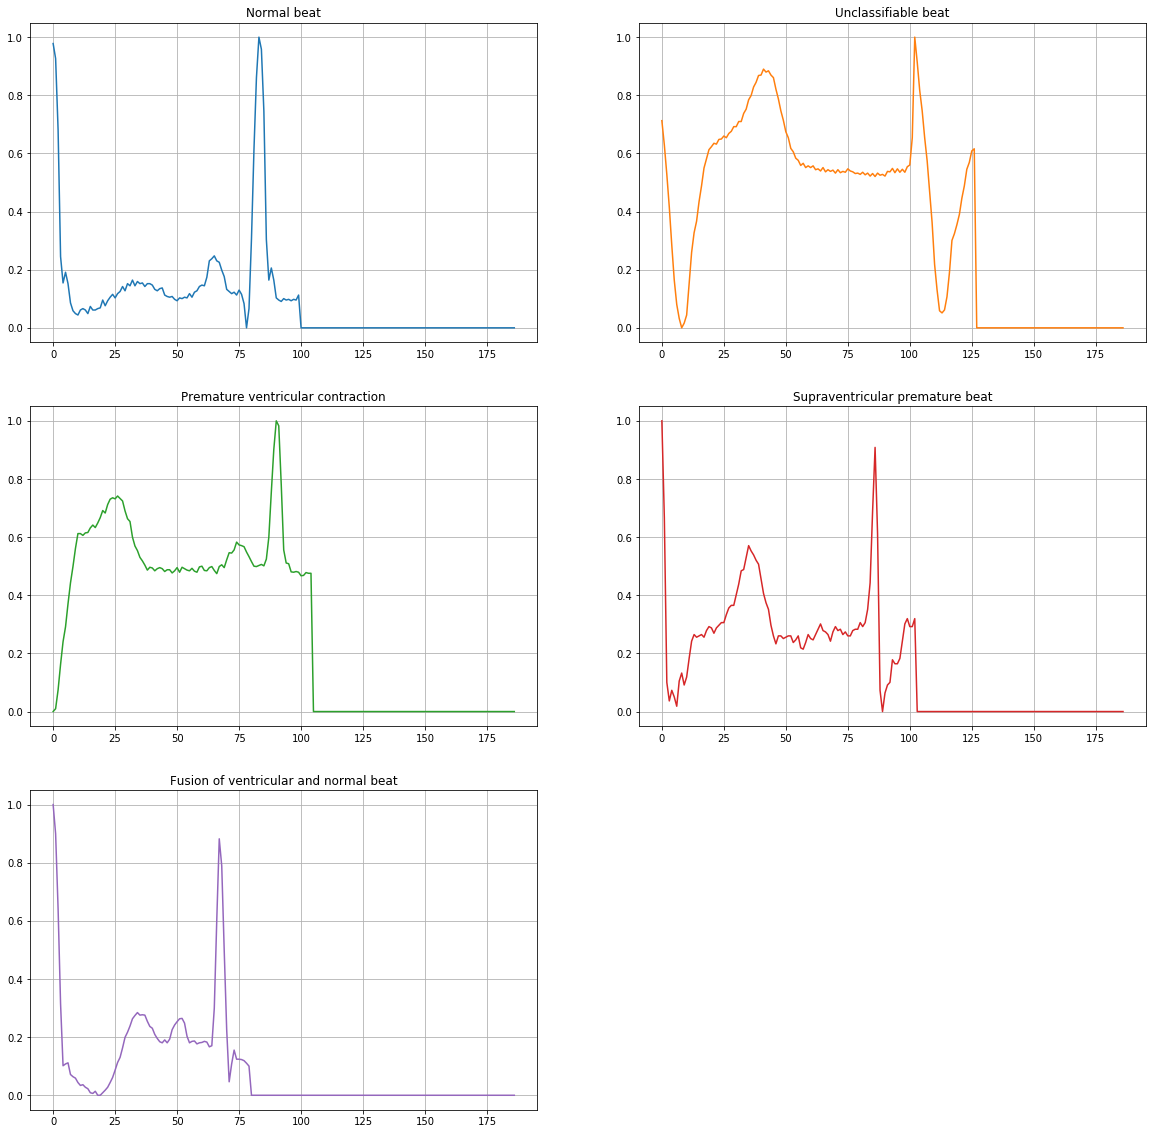

In [33]:
fig, axs = plt.subplots(3, 2, figsize=(20,20))
fig.delaxes(axs[2,1])
count = 0
cs=cm.tab10(np.arange(10)/10)

for ax in axs.flat:
    ax.plot(data_train[data_train[187]==labels[labels_ind[count]]].iloc[0,:-1],color=cs[count])
    ax.grid()
    ax.set_title('{}'.format(labels_ind_[count]))
    count += 1
    if count == 5:
        break
    

### Examples in frequency domain

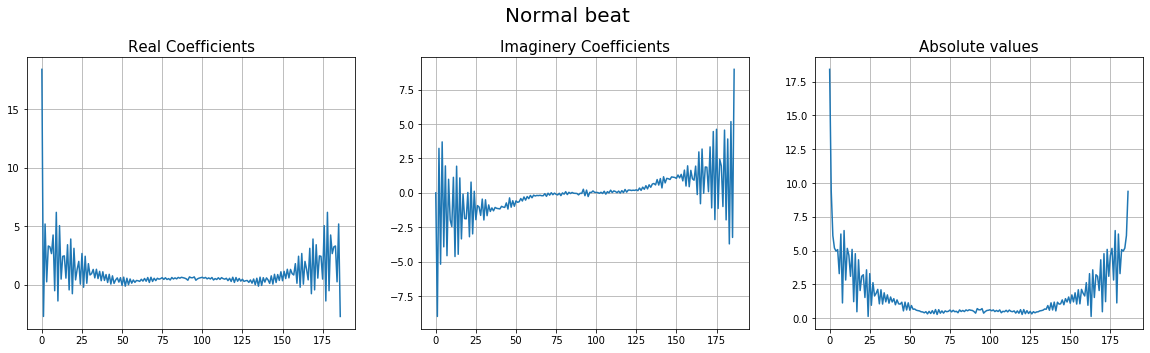

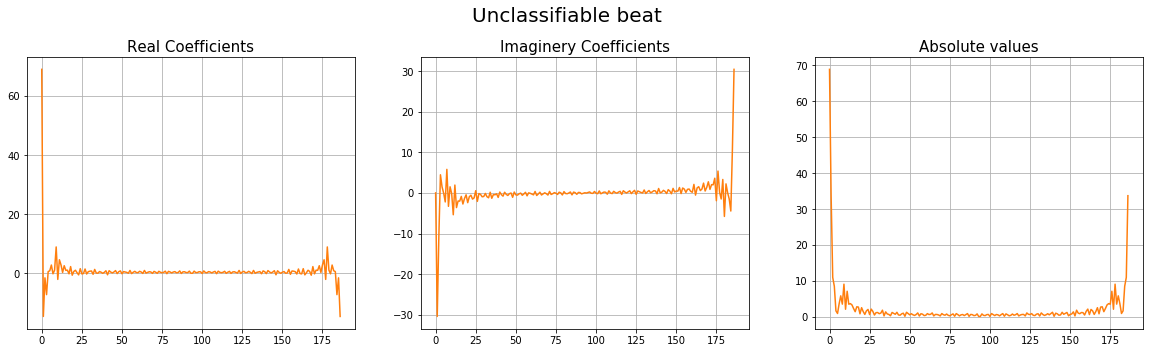

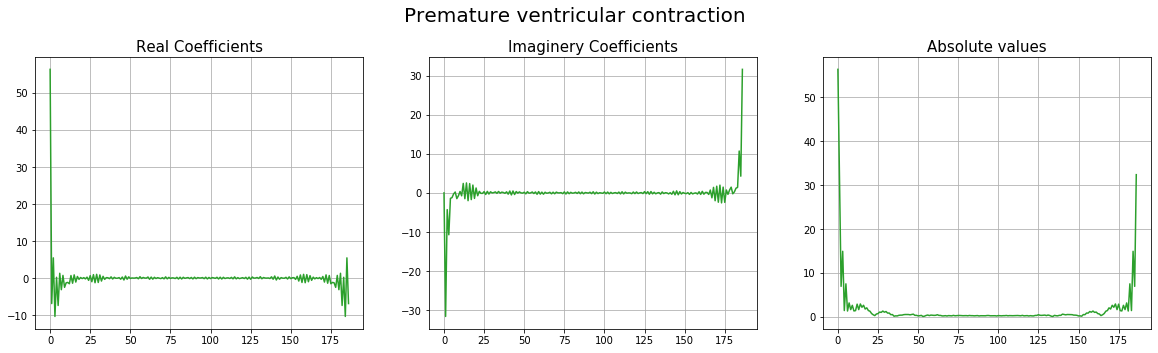

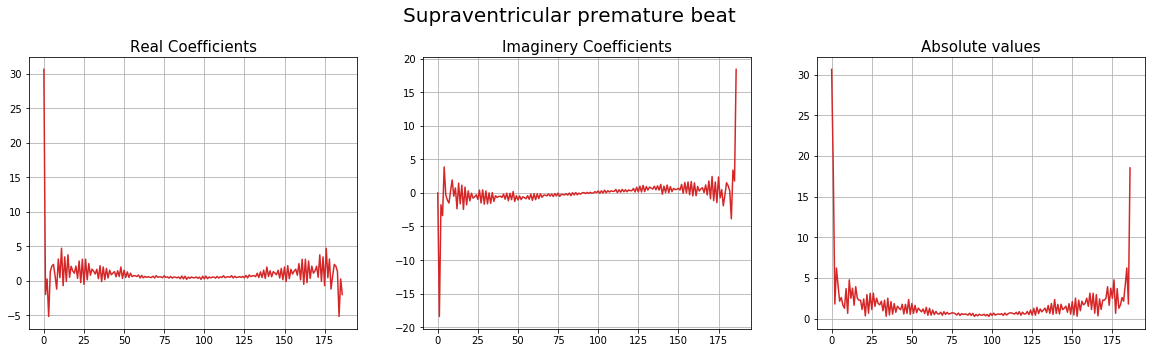

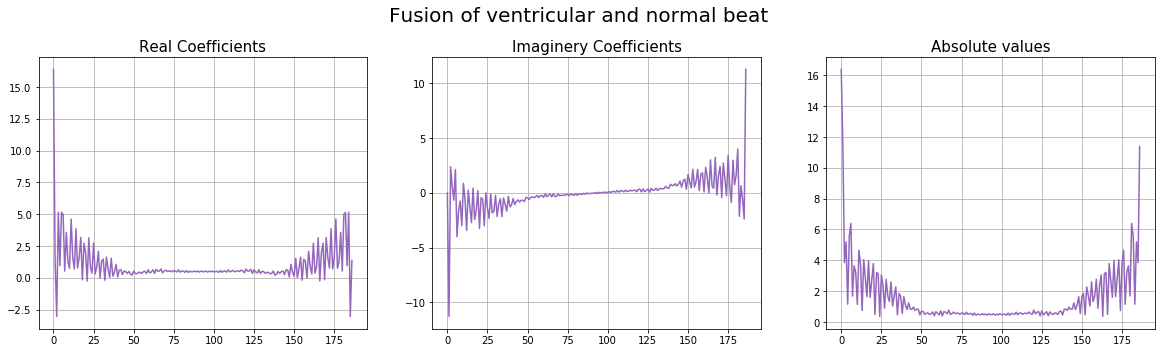

In [67]:
count = 0
cs=cm.tab10(np.arange(10)/10)

for row in range(5):
    yf = fft(list(data_train[data_train[187]==labels[labels_ind[count]]].iloc[0,:-1]))
    
    fig, axs = plt.subplots(1, 3, figsize=(20,5))
    axs[0].plot(yf.real,color=cs[count])
    axs[0].grid()
    axs[0].set_title('Real Coefficients',fontsize=15)
    axs[1].plot(yf.imag,color=cs[count])
    axs[1].grid()
    axs[1].set_title('Imaginery Coefficients',fontsize=15)
    axs[2].plot(np.abs(yf),color=cs[count])
    axs[2].grid()
    axs[2].set_title('Absolute values',fontsize=15)
    fig.suptitle('{}'.format(labels_ind_[count]),y=1.02,fontsize=20)
    plt.show()
    print("="*148)
    print('\n')
    count += 1